# Description

It analyzes how consensus partitions generated before agree with the ensemble, and selects the best ones for downstream analyses.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import conf

# Load consensus clustering results

In [3]:
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering')

In [4]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "consensus_clustering_runs.pkl").resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering/consensus_clustering_runs.pkl')

In [5]:
consensus_clustering_results = pd.read_pickle(input_file)

In [6]:
consensus_clustering_results.shape

(413, 12)

In [7]:
consensus_clustering_results.head()

,method,partition,k,ari_mean,ari_median,ari_std,ami_mean,ami_median,ami_std,nmi_mean,nmi_median,nmi_std
0,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,0.170172,0.016107,0.280429,0.182083,0.073948,0.241458,0.184787,0.076497,0.240941
1,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0.170593,0.016107,0.280689,0.198427,0.080792,0.247718,0.202181,0.083653,0.246786
2,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, ...",4,0.162009,0.086061,0.197582,0.227147,0.204954,0.145220,0.232457,0.211766,0.145033
3,scc_030,"[1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, ...",5,0.163732,0.087616,0.198028,0.238870,0.217941,0.145885,0.244974,0.225387,0.145597
4,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 5, 0, 5, 0, ...",6,0.164568,0.088147,0.199509,0.250476,0.231739,0.150811,0.257361,0.238495,0.150334


# Explore best partition per k

In [8]:
_selected_measure = "ARI"
_mean_column, _median_column = "ari_mean", "ari_median"

In [9]:
_tmp = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_mean_column, ascending=False).head(1))
    .sort_values(_mean_column, ascending=False)[
        ["method", "k", _mean_column, _median_column]
    ]
)
display(_tmp.head(10))

,,method,k,ari_mean,ari_median
k,,,,,
8,183,scc_020,8,0.224684,0.040295
10,244,scc_025,10,0.224565,0.040271
7,182,scc_020,7,0.221514,0.038231
6,181,scc_020,6,0.221500,0.038239
12,187,scc_020,12,0.220312,0.048236
11,186,scc_020,11,0.220305,0.048231
9,184,scc_020,9,0.220035,0.044590
18,193,scc_020,18,0.216592,0.054577
17,192,scc_020,17,0.216356,0.055814


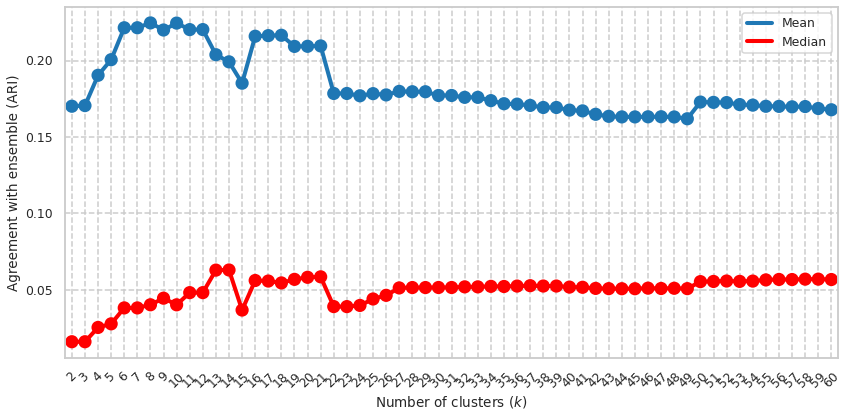

In [10]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(data=_tmp, x="k", y=_mean_column, ci=None, label="One")
    ax = sns.pointplot(
        data=_tmp, x="k", y=_median_column, ci=None, color="red", label="Two", ax=ax
    )
    ax.set_ylabel(f"Agreement with ensemble ({_selected_measure})")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend(labels=["Mean", "Median"])
    plt.grid(True)
    plt.tight_layout()

# Select best partition per k

In [11]:
_selected_stat = "Median"
_measure_col = _median_column

In [12]:
best_parts = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_measure_col, ascending=False).head(1))
    .sort_values(_measure_col, ascending=False)[
        ["method", "k", "partition", _measure_col]
    ]
)

In [13]:
best_parts = best_parts.set_index("k")

In [14]:
best_parts.shape

(59, 3)

In [15]:
# show partitions with top values
best_parts.head(10)

,method,partition,ari_median
k,,,
11,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090231
13,scc_025,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.090222
14,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090138
22,scc_020,"[1, 19, 19, 19, 19, 19, 19, 19, 19, 1, 19, 19,...",0.090117
12,scc_025,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",0.089742
15,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089679
8,scc_025,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",0.089451
9,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089429
6,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.089399


In [16]:
best_parts.sort_values("k")

,method,partition,ari_median
k,,,
2,scc_050,"[0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, ...",0.077181
3,scc_050,"[2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, ...",0.064184
4,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, ...",0.086061
5,scc_030,"[1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, ...",0.087616
6,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.089399
7,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.089399
8,scc_025,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",0.089451
9,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089429
10,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.089349


## Select partitions with highest agreement

We do not expect all partitions with different `k` to be good ones. Thus, here I select the partitions with an ensemble agreement that pass a relative high threshold (75th percentile).

In [17]:
best_parts_stats = best_parts[_measure_col].describe()
display(best_parts_stats)

count    59.000000
mean      0.074440
std       0.013918
min       0.051914
25%       0.057796
50%       0.077181
75%       0.087039
max       0.090231
Name: ari_median, dtype: float64

In [18]:
best_threshold = best_parts_stats["75%"]
best_threshold_description = "75th percentile"
display(best_threshold)

best_parts = best_parts.assign(
    selected=best_parts[_measure_col].apply(lambda x: x >= best_threshold)
)

0.08703926545868423

In [19]:
best_parts.shape

(59, 4)

In [20]:
best_parts.head()

,method,partition,ari_median,selected
k,,,,
11,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090231,True
13,scc_025,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.090222,True
14,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090138,True
22,scc_020,"[1, 19, 19, 19, 19, 19, 19, 19, 19, 1, 19, 19,...",0.090117,True
12,scc_025,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",0.089742,True


## Save best partitions per k

In [21]:
output_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(output_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering/best_partitions_by_k.pkl')

In [22]:
best_parts.to_pickle(output_file)

# Plot of selected best partitions

In [23]:
plot_data = best_parts.reset_index()
display(plot_data.head(5))

,k,method,partition,ari_median,selected
0,11,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090231,True
1,13,scc_025,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.090222,True
2,14,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090138,True
3,22,scc_020,"[1, 19, 19, 19, 19, 19, 19, 19, 19, 1, 19, 19,...",0.090117,True
4,12,scc_025,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",0.089742,True


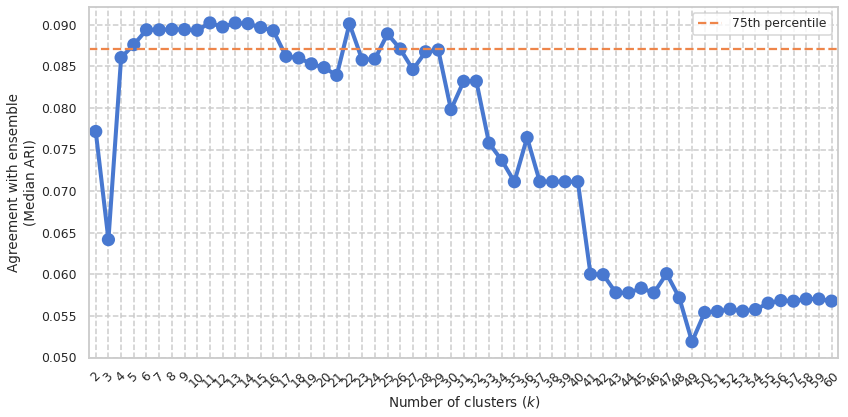

In [24]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
), sns.color_palette("muted"):
    current_palette = iter(sns.color_palette())

    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(
        data=plot_data, x="k", y=_measure_col, color=next(current_palette)
    )
    ax.axhline(
        best_threshold,
        ls="--",
        color=next(current_palette),
        label=best_threshold_description,
    )
    ax.set_ylabel(f"Agreement with ensemble\n({_selected_stat} {_selected_measure})")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

The horizontal line in the plot is the median of the average agreement value; partitions above that line are marked as selected for downstream analysis

In [25]:
# this list shows the selected final partitions, and which methods achieved the highest agreement
plot_data[plot_data["selected"]].sort_values("k")

,k,method,partition,ari_median,selected
13,5,scc_030,"[1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, ...",0.087616,True
8,6,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.089399,True
9,7,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.089399,True
6,8,scc_025,"[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...",0.089451,True
7,9,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089429,True
10,10,eac_complete_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.089349,True
0,11,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090231,True
4,12,scc_025,"[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1...",0.089742,True
1,13,scc_025,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.090222,True
2,14,scc_025,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090138,True


From the two evidence accumulation approaches (EAC) we are using, the spectral clustering based one does it better for almost all `k` values, whereas the hierarchical clustering based approach seems to do a little bit better for lower `k`.